<a href="https://colab.research.google.com/github/yashsandansing/fractal_analysis/blob/main/fractal_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Tasks
---
1. Exploratory fractal analysis
  * Explore data
  * Plot data
1. Which class of data is more complex?
1. Use two or more fractal dimension methods to describe data
1. Use appropriate statistical tests to show which method gives better results.


# 1.Exploratory Fractal Analysis

In [36]:
! pip install hurst nolds statsmodels

In [37]:
#Import Cell
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from hurst import compute_Hc
import nolds
import statsmodels

In [38]:
#Ignore deprecation and future warnings
#delete this cell if notebook not running smoothly 
import warnings
warnings.filterwarnings("ignore")

In [39]:
file = pd.read_csv("/content/intern_dataset.csv")

In [40]:
file.head()

,Time,Signal1,Signal2,Label
0,2017-08-14 11:37:49.791,33668.091913,0.856726,A
1,2017-08-14 11:37:49.801,32564.903040,0.856705,A
2,2017-08-14 11:37:49.811,31454.043305,0.856683,A
3,2017-08-14 11:37:49.821,30335.387166,0.856659,A
4,2017-08-14 11:37:49.831,29207.142938,0.856634,A


In [41]:
file.Label.value_counts()

A    318000
B    312000
C    282000
Name: Label, dtype: int64

In [42]:
file.dtypes

Time        object
Signal1    float64
Signal2    float64
Label       object
dtype: object

In [43]:
#Checking for null values
file.isnull().sum()

Time       0
Signal1    0
Signal2    0
Label      0
dtype: int64

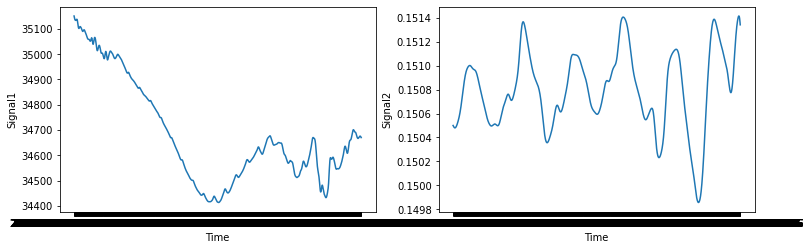

In [44]:
#Plotting signals w.r.t time
#taking a subset since the data is too big and takes up a lot of computational time
#For signal 1
plt.figure(figsize=(60,40))
plt.subplot(991)
sns.lineplot(data=file[::-1][0:2000][::-1],x="Time",y="Signal1")
#For signal2 also.
plt.subplot(992)
sns.lineplot(data=file[::-1][0:2000][::-1],x="Time",y="Signal2")
plt.show()

In [45]:
#mean of each category of Label
file.groupby(['Label'])['Signal1','Signal2'].mean()

,Signal1,Signal2
Label,,
A,30900.207581,0.371612
B,31693.976570,0.642296
C,31364.681913,0.157482


In [46]:
#std of each category of Label
file.groupby(['Label'])['Signal1', 'Signal2'].std()

,Signal1,Signal2
Label,,
A,14506.810996,0.157220
B,10693.240850,0.238301
C,8864.887863,0.010161


# Statistical Tests for analysis
We perform statistical test to check for stationary of signal data for each class using AD Fuller test.

In [47]:
#subseting dataset into 3 subsets of categories of label
ClassA=file[file['Label']=='A']
ClassB=file[file['Label']=='B']
ClassC=file[file['Label']=='C']

In [48]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [49]:
# adf_test(ClassA['Signal1'])
# adf_test(class_A['Signal2'])
# adf_test(class_B['Signal1'])
# adf_test(class_B['Signal2'])
# adf_test(class_C['Signal1'])
# adf_test(class_C['Signal2'])

We do adf_test for each class and each and corresponding signal. *(Code is commented due to computation issues)*

If test statistic is less than critical value, then the time series is non stationary.

If test statistic is greater than critical value, then the time series is stationary.

Upon doing adf_test for each class and corresponding signal, it becomes evident that Signal1 is stationary and Signal2 is non stationary.

We use following methods for our fractal analysis.
Methods well suited for stationary time series

*    Hurst exponent 

Method well suited for non stationary time series

*    Detrended fluctuation analysis


# 2. Which class of data is more complex?
  * Methods used:
    1. Hurst exponent
    2. Detrended Fluctuation Analysis (DFA)

**Hurst exponent(H):**
* H = 0.5 — Brownian motion,
* 0.5 < H < 1.0 — persistent behavior,
* 0 < H < 0.5 — anti-persistent behavior.

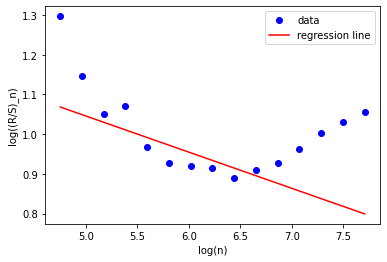

0.40891475594956767

In [50]:
nolds.hurst_rs(ClassA['Signal1'],debug_plot=True)

Hurst exponent is above and near 0.5. Given data is close to brownian motion and follow slight persistent behaviour. The data is completely uncorrelated with slight autocorrelation.

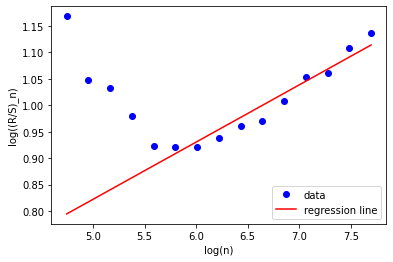

0.6082193903732962

In [51]:
nolds.hurst_rs(ClassB['Signal1'],debug_plot=True)

The pattern is similar to above.

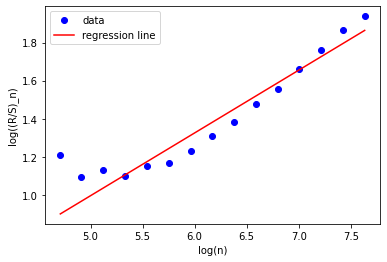

0.8292981622514974

In [52]:
nolds.hurst_rs(ClassC['Signal1'],debug_plot=True)

H(C1) is under 1. So signal's trend will be always autocorrelated and persistent.

**Detrended Fluctuation Analysis (DFA)**

* alpha <1/2: anti-correlated
* alpha = 1/2: uncorrelated, white noise
* alpha >1/2: correlated
* alpha = 1: 1/f-noise, pink noise
* alpha >1: non-stationary, unbounded
* alpha = 3/2: Brownian noise 

In [59]:
dfa_dict = {}
dfa_dict['signal1_A'] = nolds.dfa(ClassA['Signal1'], debug_data=True)
dfa_dict['signal1_B'] = nolds.dfa(ClassB['Signal1'], debug_data=True)
dfa_dict['signal1_C'] = nolds.dfa(ClassC['Signal1'], debug_data=True)
dfa_dict['signal2_A'] = nolds.dfa(ClassA['Signal2'], debug_data=True)
dfa_dict['signal2_B'] = nolds.dfa(ClassB['Signal2'], debug_data=True)
dfa_dict['signal2_C'] = nolds.dfa(ClassC['Signal2'], debug_data=True)

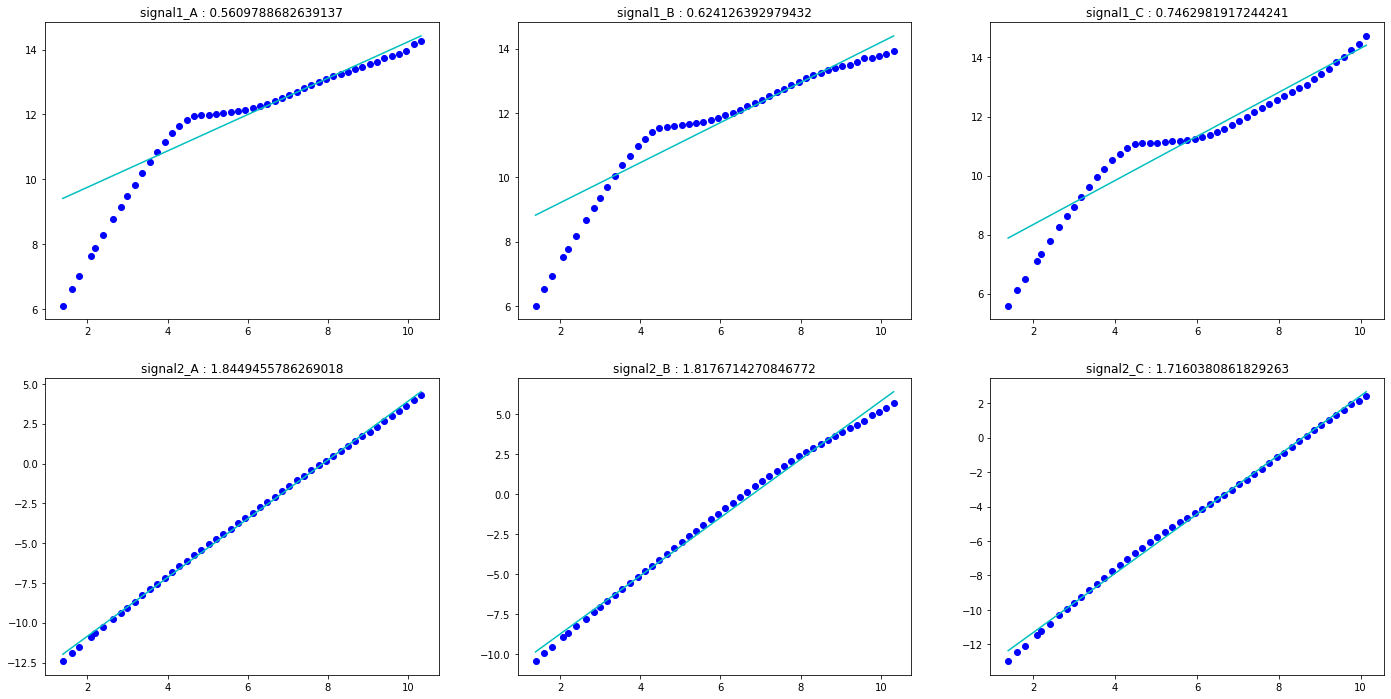

In [61]:
#plotting dfa values
fig, axes = plt.subplots(2, 3, figsize=(24, 12))
keys = list(dfa_dict.keys())
for i in range(2):
  for j in range(3):
    idx = keys.pop(0)
    m = dfa_dict[idx][0]
    b = dfa_dict[idx][1][2][1]
    x = dfa_dict[idx][1][0]
    y = dfa_dict[idx][1][1]
    axes[i][j].plot(x, y, 'ob')
    axes[i][j].plot(x, m*x + b, 'c')
    axes[i][j].set_title(f'{idx} : {m}')
fig.show()

In [62]:
# DFA Values
for key, value in dfa_dict.items():
  print(f'{key}: {value[0]}')

signal1_A: 0.5609788682639137
signal1_B: 0.624126392979432
signal1_C: 0.7462981917244241
signal2_A: 1.8449455786269018
signal2_B: 1.8176714270846772
signal2_C: 1.7160380861829263


**SIGNAL 1**
* ClassA = 0.5747595732623282
* ClassB = 0.6082193903732962
* ClassC = 0.8806398977648875

Class A and B both have very similar and least Hurst exponent. Class C has highest Hurst exponent of 0.88. **So class C is most complex class from Hurst exponent analysis.**

**SIGNAL 2**

Results of DFA show that alpha>1 for signal2 further confirming that it is non stationary.

To get H parameter we subtract 1 from alpha values.

So H values for classes are:

ClassA: 0.845

ClassB: 0.818

ClassC: 0.716

For Self Similar time series, it is possible to get fractal dimension from H value

FD= 2-H

Fractal dimensions of classes are:

ClassA: 1.155

ClassB: 1.182

ClassC: 1.284

Since the fractal dimensions of Class C are highest, **Class C is the complex class.**

Based on Hurst Component for Signal1 and Fractal Dimensions of Signal2 obtained from DFA, we can conclude that

 **ClassC is the most complex of the given classes.**

# REFERENCES

* https://github.com/RushikeshGholap/FractalAnalysis/blob/main/Fractal%20Analysis.ipynb
* https://github.com/Parthgaba/Fractal_Analysis/blob/main/intern_task.ipynb
* https://github.com/abhiwolf13/Fractal_Analysis/blob/main/fractal_analysis.ipynb
* https://github.com/HrithikaDodia/fractal-analysis/blob/master/HrithikaFractalAnalysis.ipynb
* https://nolds.readthedocs.io/en/latest/
* https://github.com/Mottl/hurst
